<a href="https://colab.research.google.com/github/ulises1229/DataAnalisysBigData_BLOQUE/blob/main/code/BigData_BLOQUE_Sesi%C3%B3n_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

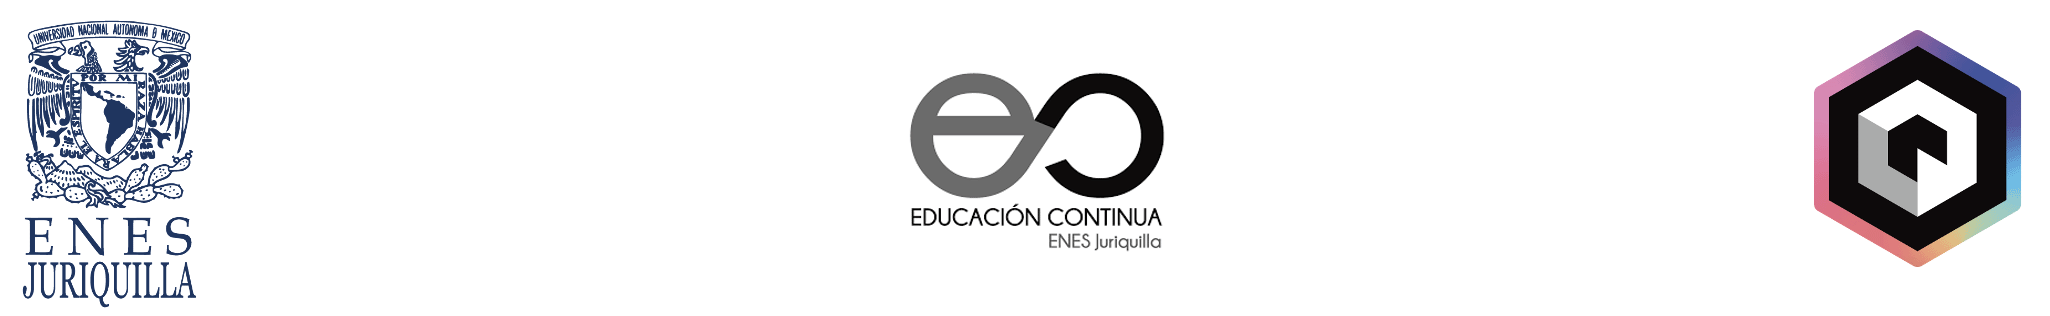



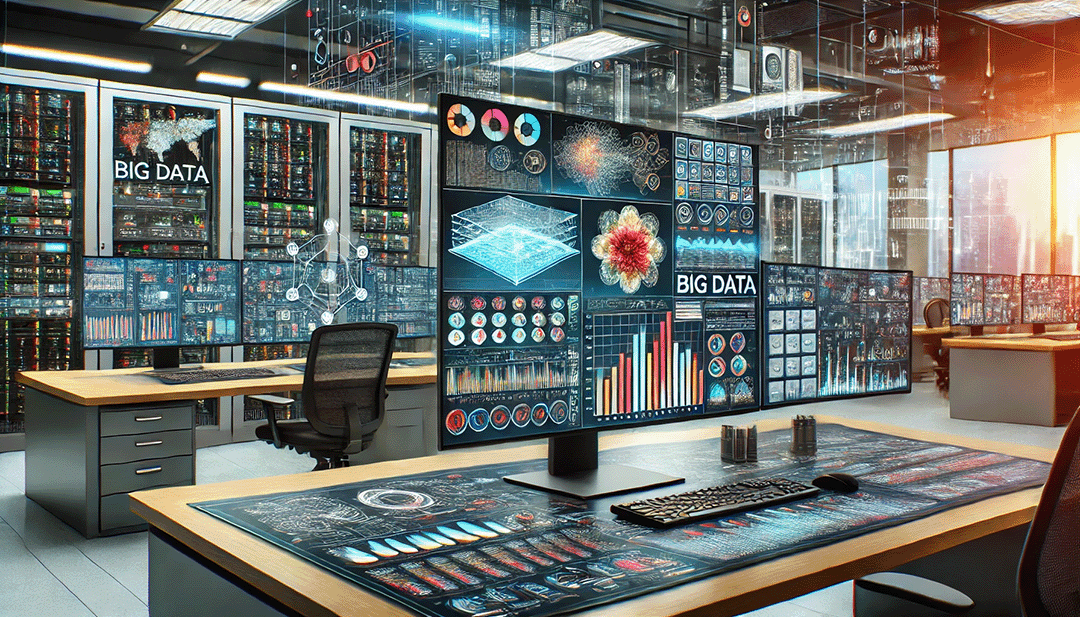

# Curso de capacitación en Análisis de Datos y Big Data
### Día 6 - Aprendizaje supervisado y Pyspark

##### Autor: Ulises Olivares
##### uolivares@unam.mx
##### 20 de agosto de 2024


# 1. Clasificación Supervisada con Scikit-Learn

Este notebook presenta una introducción detallada a los algoritmos de clasificación supervisada utilizando la biblioteca `scikit-learn` en Python. Utilizaremos el conjunto de datos **Digits** del módulo `datasets` de `sklearn`, que contiene imágenes de dígitos manuscritos. Exploraremos diferentes algoritmos de clasificación y visualizaremos los resultados para comprender mejor cómo funcionan.

## Objetivos
- Entender los conceptos básicos de la clasificación supervisada.
- Aprender a usar `scikit-learn` para implementar algoritmos de clasificación con imágenes.
- Realizar ejercicios prácticos para reforzar el aprendizaje.

## Ejemplos y Ejercicios
Los ejemplos proporcionados estarán basados en el uso de `KNeighborsClassifier`, `DecisionTreeClassifier` y `RandomForestClassifier`. Después de cada sección, se incluirán ejercicios sencillos para que los estudiantes los resuelvan en clase.


## 1. Carga de Datos

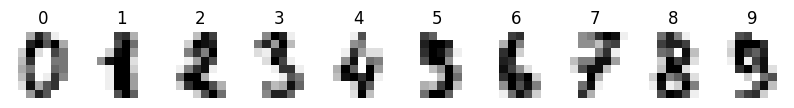

In [1]:

from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize

# Cargar los datos de Digits directamente desde sklearn
digits = datasets.load_digits()
X = digits.images
y = digits.target

# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for ax, image, label in zip(axes, X[:10], y[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'{label}')
plt.show()

# Convertir las imágenes a un formato adecuado para la clasificación
n_samples = len(X)
X = X.reshape((n_samples, -1))


## 2. Exploración de Datos

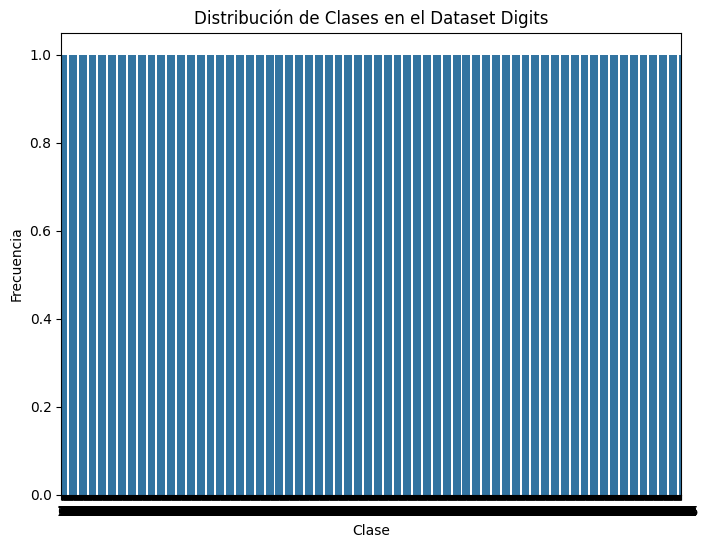

In [2]:

# Mostrar la distribución de clases
plt.figure(figsize=(8, 6))
sns.countplot(y)
plt.title('Distribución de Clases en el Dataset Digits')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()


## 3. Implementación de Algoritmos de Clasificación

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 3.1. K-Nearest Neighbors (KNN)

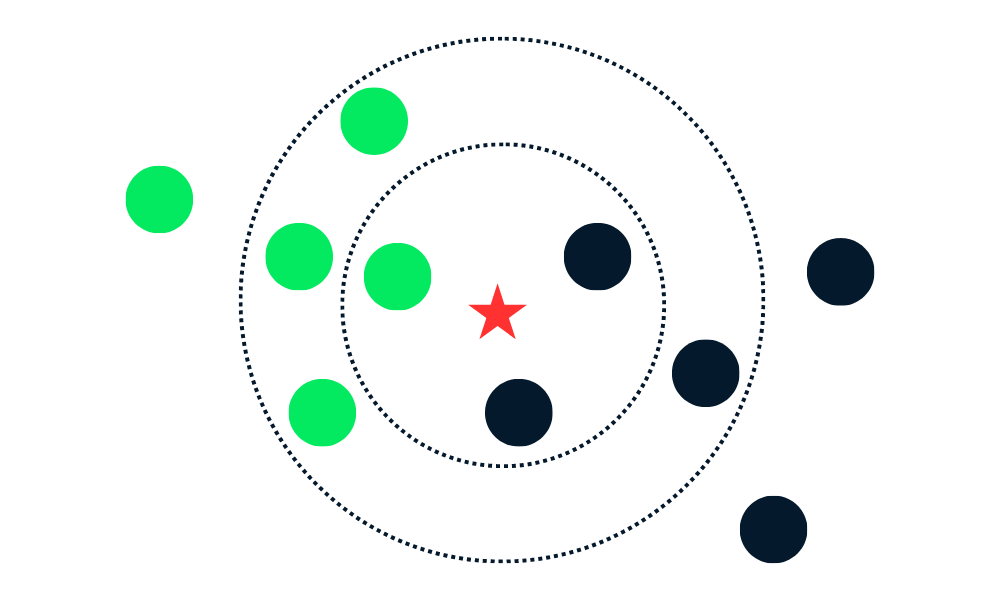

[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  1 46  0  0  0  0  0  0  0]
 [ 0  0  1 51  0  0  0  0  1  1]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 64  1  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  1  1  0  0  0  0 40  0]
 [ 0  0  0  2  1  1  1  0  1 53]]


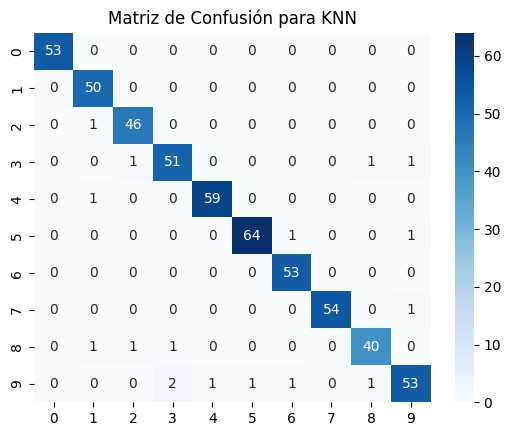

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      1.00      0.97        50
           2       0.96      0.98      0.97        47
           3       0.94      0.94      0.94        54
           4       0.98      0.98      0.98        60
           5       0.98      0.97      0.98        66
           6       0.96      1.00      0.98        53
           7       1.00      0.98      0.99        55
           8       0.95      0.93      0.94        43
           9       0.95      0.90      0.92        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

Accuracy: 0.97


In [4]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para KNN')
plt.show()

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


### Ejercicio 1: Modificar el número de vecinos en KNN y observar el impacto en la precisión.

### 3.2. Árbol de Decisión

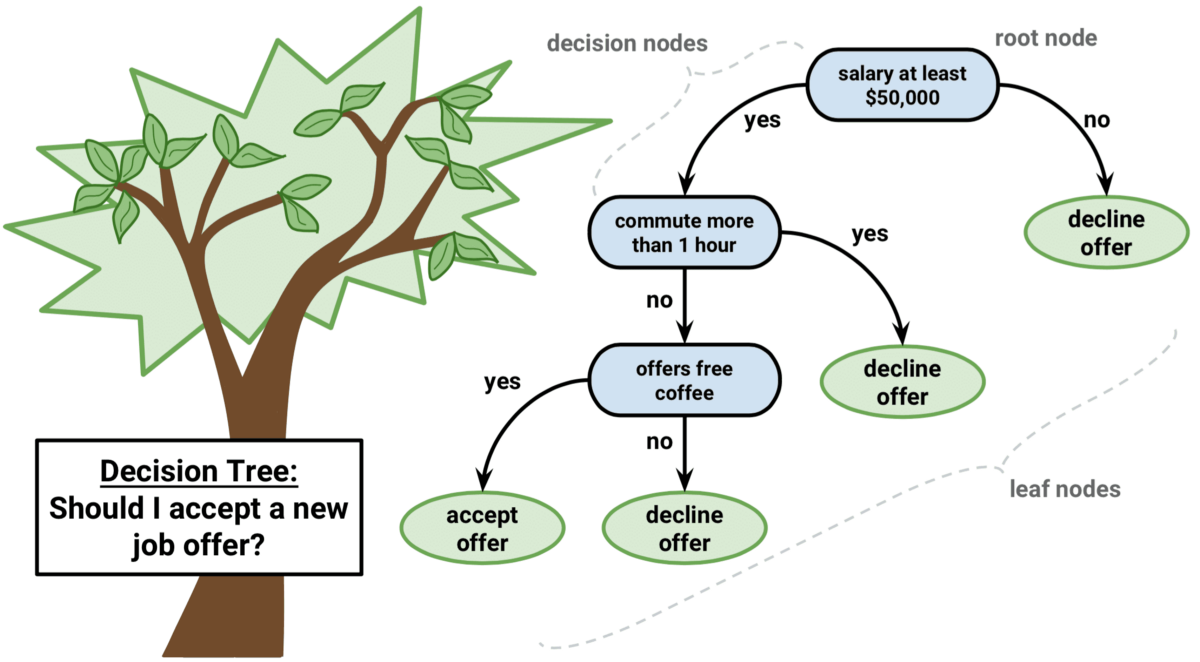

[[48  0  0  1  2  1  0  0  0  1]
 [ 1 40  5  1  2  0  0  0  0  1]
 [ 3  3 35  3  0  0  0  1  1  1]
 [ 0  1  0 46  2  0  0  1  1  3]
 [ 0  3  1  1 51  0  2  1  0  1]
 [ 0  0  0  1  1 57  2  1  0  4]
 [ 0  0  0  1  2  0 50  0  0  0]
 [ 0  1  0  4  2  0  0 46  1  1]
 [ 0  6  0  1  0  0  0  1 33  2]
 [ 0  0  1  0  1  4  0  3  0 50]]


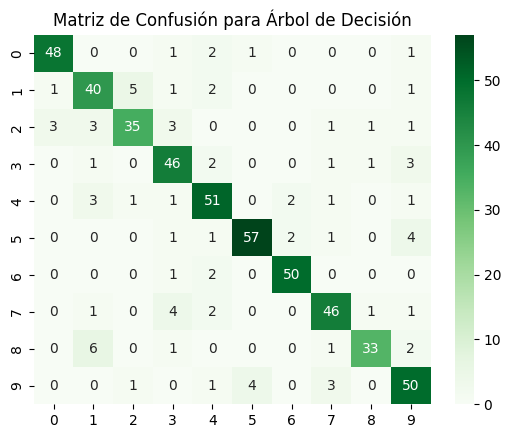

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        53
           1       0.74      0.80      0.77        50
           2       0.83      0.74      0.79        47
           3       0.78      0.85      0.81        54
           4       0.81      0.85      0.83        60
           5       0.92      0.86      0.89        66
           6       0.93      0.94      0.93        53
           7       0.85      0.84      0.84        55
           8       0.92      0.77      0.84        43
           9       0.78      0.85      0.81        59

    accuracy                           0.84       540
   macro avg       0.85      0.84      0.84       540
weighted avg       0.85      0.84      0.84       540

Accuracy: 0.84


In [5]:

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión para Árbol de Decisión')
plt.show()

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


### Ejercicio 2: Ajustar los parámetros del Árbol de Decisión para mejorar la precisión.

### 3.3. Random Forest

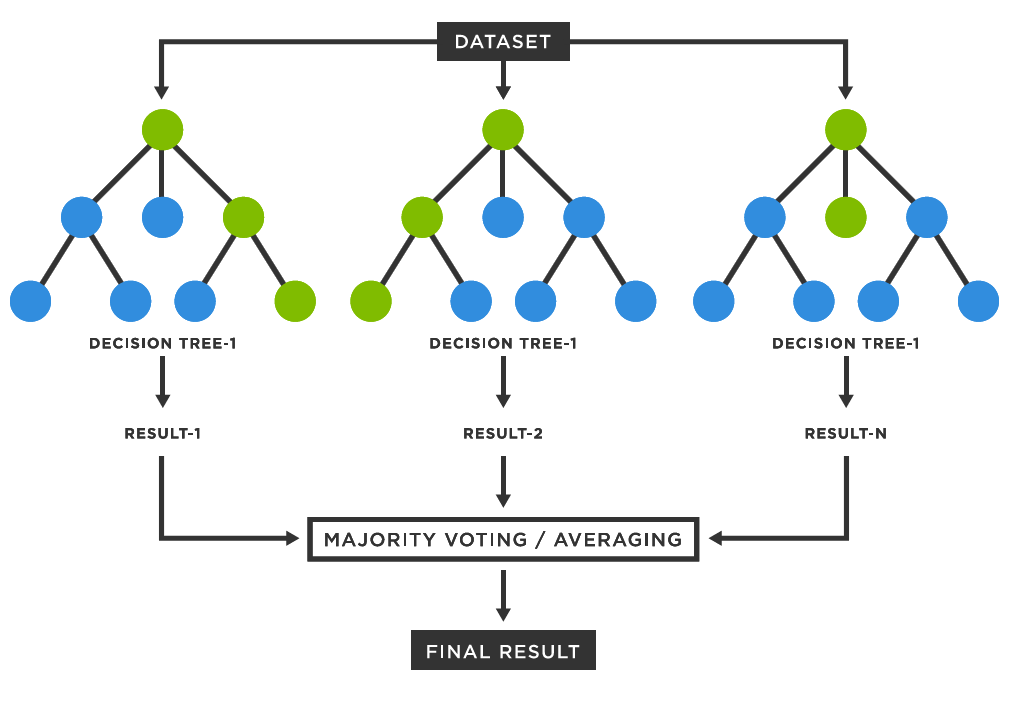

[[52  0  0  0  1  0  0  0  0  0]
 [ 0 49  1  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 56]]


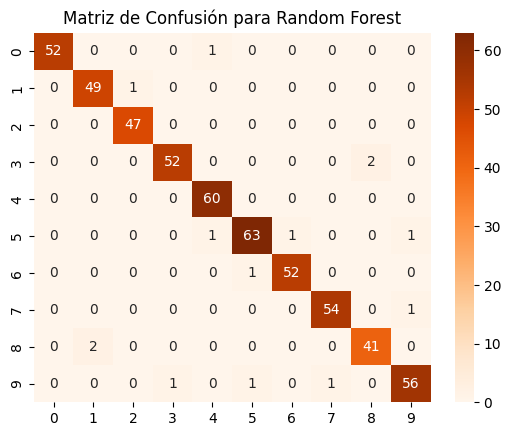

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      0.98      0.97        50
           2       0.98      1.00      0.99        47
           3       0.98      0.96      0.97        54
           4       0.97      1.00      0.98        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.95      0.95        43
           9       0.97      0.95      0.96        59

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

Accuracy: 0.97


In [6]:

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title('Matriz de Confusión para Random Forest')
plt.show()

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


### Ejercicio 3: Comparar los resultados de Random Forest con los de KNN y Árbol de Decisión.

# Clasificación de vino

In [7]:

# Cargar el conjunto de datos Wine directamente desde sklearn
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 3.1. K-Nearest Neighbors (KNN)

[[19  0  0]
 [ 1 19  1]
 [ 0  0 14]]


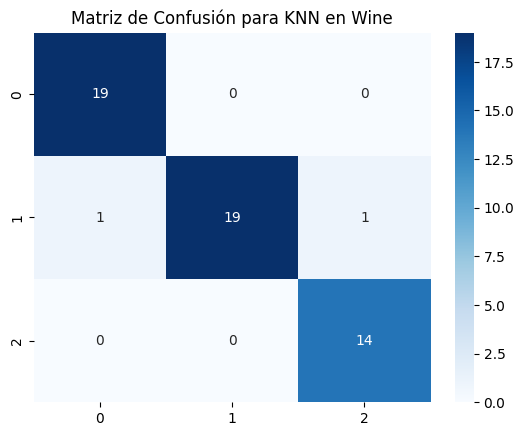

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Accuracy: 0.96


In [8]:

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión para KNN en Wine')
plt.show()

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


### Ejercicio 7: Modificar el número de vecinos en KNN y observar el impacto en la precisión en Wine.

### 3.2. Árbol de Decisión

[[18  1  0]
 [ 0 21  0]
 [ 1  0 13]]


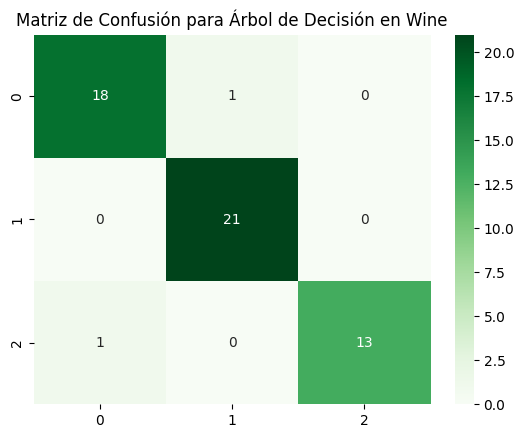

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54

Accuracy: 0.96


In [9]:

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión para Árbol de Decisión en Wine')
plt.show()

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


### Ejercicio 8: Ajustar los parámetros del Árbol de Decisión para mejorar la precisión en Wine.

### 3.3. Random Forest

[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


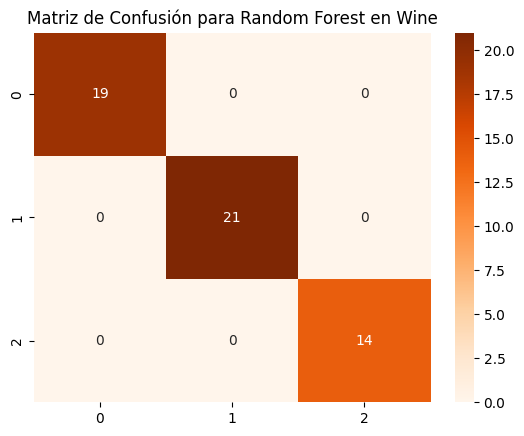

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Accuracy: 1.00


In [10]:

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges')
plt.title('Matriz de Confusión para Random Forest en Wine')
plt.show()

print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
